In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [3]:
N=2*1000

In [4]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)
acf1=np.hstack([np.log(f2/f1),acf1])

[ 0.  1.  2. ... -3. -2. -1.]
100.0 1000.0


In [5]:
acf1[N//2]

0.0009943527239186958

In [109]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

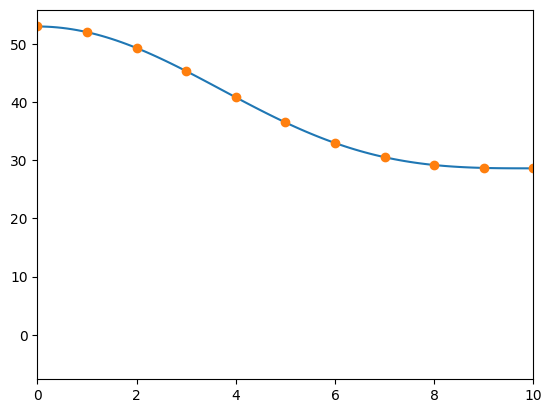

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [34]:
ps=np.fft.rfft(acf1-np.mean(acf1))

In [31]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])

In [37]:
ps[1]

(-2.0263004879710125-6.267477991673057e-15j)

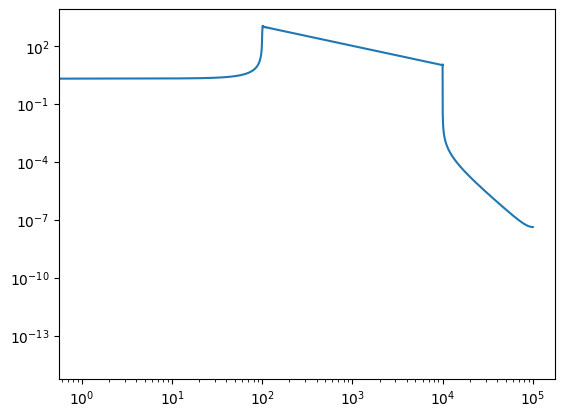

In [36]:
plt.loglog(np.abs(ps))

In [8]:
f1*N, f2*N

(100.0, 1000.0)

In [5]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

(0.0, 10.0)

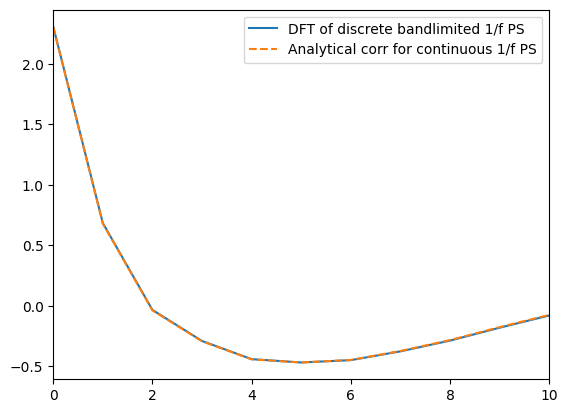

In [6]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,10)

In [15]:
taus[N//2-1]

999.0

In [7]:
C=toeplitz(acf1[:N//2])+np.eye(N//2)*1e-4
Cinv=np.linalg.inv(C)

In [46]:
npoints=1000000000
dtaus=np.arange(1,npoints//2+1)/npoints
coeff_arr = np.zeros((len(dtaus),N//2))
my_tau = taus[:N//2].copy()

MemoryError: Unable to allocate 3.64 TiB for an array with shape (500000000, 1000) and data type float64

In [31]:
coeff_arr.shape

(5000, 1000)

In [40]:
dtaus

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [32]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtau
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [33]:
coeff_arr.shape

(5000, 1000)

In [20]:
coeff_arr

array([[-7.75160677e-07, -1.12115948e-06, -2.15155766e-06, ...,
        -2.05709264e-04, -2.63792539e-04,  9.99836545e-01],
       [-1.12126118e-06, -1.50259467e-06, -3.05457910e-06, ...,
        -2.65106876e-04, -4.46360863e-04,  9.99800749e-01],
       [-1.46741304e-06, -1.88412414e-06, -3.95776443e-06, ...,
        -3.24535583e-04, -6.28928606e-04,  9.99764910e-01],
       ...,
       [-2.74448400e-03, -5.10540114e-03, -8.93805776e-03, ...,
        -1.54466022e+00, -1.14594820e+00, -6.35729104e-01],
       [-2.74444168e-03, -5.10560031e-03, -8.93818378e-03, ...,
        -1.54478829e+00, -1.14596663e+00, -6.35888988e-01],
       [-2.74439928e-03, -5.10579934e-03, -8.93830955e-03, ...,
        -1.54491633e+00, -1.14598504e+00, -6.36048843e-01]])

In [34]:
coeff_arr

array([[-7.75160677e-07, -1.12115948e-06, -2.15155766e-06, ...,
        -2.05709264e-04, -2.63792539e-04,  9.99836545e-01],
       [-1.12126118e-06, -1.50259467e-06, -3.05457910e-06, ...,
        -2.65106876e-04, -4.46360863e-04,  9.99800749e-01],
       [-1.46741304e-06, -1.88412414e-06, -3.95776443e-06, ...,
        -3.24535583e-04, -6.28928606e-04,  9.99764910e-01],
       ...,
       [-1.93988849e-03, -2.75864015e-03, -5.56574747e-03, ...,
        -6.60612021e-01, -8.01975991e-01,  3.53666733e-01],
       [-1.94022925e-03, -2.75926978e-03, -5.56684636e-03, ...,
        -6.60799861e-01, -8.02097583e-01,  3.53467403e-01],
       [-1.94056995e-03, -2.75989939e-03, -5.56794515e-03, ...,
        -6.60987713e-01, -8.02219155e-01,  3.53268057e-01]])

In [21]:
u,s,vT=np.linalg.svd(coeff_arr)

In [35]:
u1,s1,vT1=np.linalg.svd(coeff_arr)

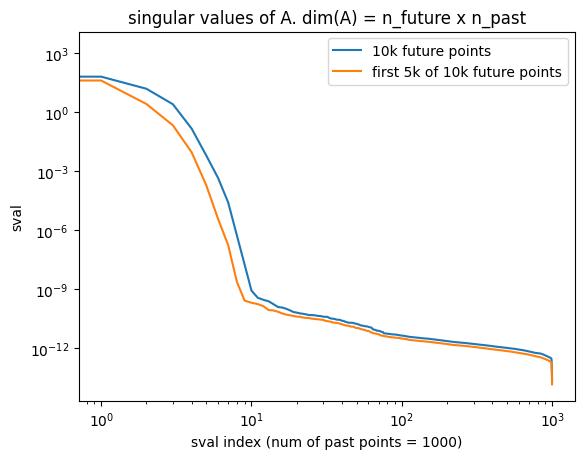

In [45]:
plt.loglog(s,label='10k future points')
plt.loglog(s1,label='first 5k of 10k future points')
plt.title("singular values of A. dim(A) = n_future x n_past")
plt.xlabel("sval index (num of past points = 1000)")
plt.ylabel("sval")
plt.legend()

In [36]:
s

array([1.71375893e+03, 6.22928974e+01, 1.51246134e+01, 2.47586649e+00,
       1.42559610e-01, 6.20589011e-03, 4.39752177e-04, 2.51632248e-05,
       5.33825461e-07, 1.70073193e-08, 8.46161098e-10, 3.67296167e-10,
       2.87321244e-10, 2.42062940e-10, 1.72620913e-10, 1.23685071e-10,
       1.16694875e-10, 1.01088025e-10, 8.44264034e-11, 6.88651086e-11,
       6.42892617e-11, 5.89075558e-11, 5.60731787e-11, 5.27867598e-11,
       4.87753244e-11, 4.81881495e-11, 4.75704085e-11, 4.55533178e-11,
       4.33708769e-11, 4.26822123e-11, 3.99243554e-11, 3.95381330e-11,
       3.91363901e-11, 3.43872436e-11, 3.19945486e-11, 3.14575100e-11,
       3.00538857e-11, 2.81807827e-11, 2.80420702e-11, 2.73067649e-11,
       2.46323261e-11, 2.45303175e-11, 2.20836034e-11, 2.11562440e-11,
       1.98171259e-11, 1.97318896e-11, 1.96878468e-11, 1.95596147e-11,
       1.87530222e-11, 1.77859857e-11, 1.73700426e-11, 1.66271333e-11,
       1.58767057e-11, 1.45613071e-11, 1.44364792e-11, 1.37806336e-11,
      

In [37]:
s1

array([5.93544900e+02, 3.96749586e+01, 2.54659646e+00, 2.11104694e-01,
       8.93517106e-03, 1.91973120e-04, 3.63570882e-06, 1.71848067e-07,
       2.33448502e-09, 2.61169646e-10, 2.03519750e-10, 1.75044157e-10,
       1.36810243e-10, 8.73425985e-11, 8.30347192e-11, 7.12359240e-11,
       5.84065705e-11, 5.12336555e-11, 4.72677387e-11, 4.42185459e-11,
       4.02443338e-11, 3.94585291e-11, 3.62871823e-11, 3.45799044e-11,
       3.42336223e-11, 3.21360101e-11, 3.08251186e-11, 2.99153008e-11,
       2.92264961e-11, 2.81919580e-11, 2.73341729e-11, 2.45557540e-11,
       2.36586089e-11, 2.27687981e-11, 2.16036266e-11, 2.00813614e-11,
       1.96479544e-11, 1.92404620e-11, 1.85680004e-11, 1.74583287e-11,
       1.65538641e-11, 1.55358368e-11, 1.45116246e-11, 1.41622736e-11,
       1.39286684e-11, 1.34186586e-11, 1.24800002e-11, 1.24363385e-11,
       1.21324005e-11, 1.10436666e-11, 1.06265608e-11, 1.05027090e-11,
       1.02449594e-11, 9.49850078e-12, 9.16721983e-12, 8.88778395e-12,
      

In [11]:
Cdft=toeplitz(acf_dft[:N//2]*N/2)+np.eye(N//2)*1e-4
Ccnt=toeplitz(acf1[:N//2])+np.eye(N//2)*1e-4
dC = Ccnt-Cdft
S=acf1[1:N//2+1]

In [12]:
Cdft_inv = np.linalg.inv(Cdft)
Ccnt_inv = np.linalg.inv(Ccnt)

In [13]:
G = dC@Ccnt_inv@S

In [14]:
err_var = Ccnt[0,0] - S.T@Ccnt_inv@S 

In [15]:
err_var

0.7783557141636803

In [89]:
G.T@Ccnt_inv@G

0.05889682271959835

In [16]:
G.T@Ccnt_inv@G

0.016029203469595386

In [17]:
dC

array([[-5.00082500e-04, -4.75616436e-04, -4.04605858e-04, ...,
        -3.65767541e-05, -2.17584345e-04, -3.77322416e-04],
       [-4.75616436e-04, -5.00082500e-04, -4.75616436e-04, ...,
         1.48000057e-04, -3.65767541e-05, -2.17584345e-04],
       [-4.04605858e-04, -4.75616436e-04, -5.00082500e-04, ...,
         3.18074871e-04,  1.48000057e-04, -3.65767541e-05],
       ...,
       [-3.65767541e-05,  1.48000057e-04,  3.18074871e-04, ...,
        -5.00082500e-04, -4.75616436e-04, -4.04605858e-04],
       [-2.17584345e-04, -3.65767541e-05,  1.48000057e-04, ...,
        -4.75616436e-04, -5.00082500e-04, -4.75616436e-04],
       [-3.77322416e-04, -2.17584345e-04, -3.65767541e-05, ...,
        -4.04605858e-04, -4.75616436e-04, -5.00082500e-04]])

In [20]:
0.05/0.77

0.06493506493506494